# Comic Books Recommendation System  
## Based on Fantasy Book Preferences

By Ramil Chaimongkolbutr

***

![goodreadslogo](./images/logo.jpg)

***

## Overview

Recommendation system has been an integral part of tech companies' success for years. It helps generate around 35% of Amazon's revenue; it increases 33% of Spotify users; it contributes to 75% of what users watch on Netflix; and it is accounted for 60% of video clicks on Youtube. Recommendation system is used in a variety of areas, with commonly recognized examples taking the form of playlist generators for video and music services, relatable product recommenders for online stores, or content recommenders for social media platforms, or personalized topics such as restaurants and online dating.

***

## Business Problem

Amazon Books are looking to expand their sale in fantasy book section. Their plan is not only limited to recommending books within a certain genres, but also introducing new books from a different genres. We are tasked to build up a recommendation system that allows us to recommend cross-genre books, which in our case, comic books, to a customer based on his/her preference in fantasy book.

***

## Data

Data was collected directly from Goodreads API in 2017 and made availble by [Mengting Wan et al.](https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home) online (please click the name for the link to download). For more infomation, please visit Mengting's [Github repository](https://github.com/MengtingWan/goodreads).

**Note**: the dataset is too large to be uploaded on github.  
Here are steps to acquire the dataset in order to make our codes work:
1. Download these following datasets:
    - "goodreads_books_comics_graphics.jason.gz" by this [link](https://drive.google.com/uc?id=1ICk5x0HXvXDp5Zt54CKPh5qz1HyUIn9m).
    - "goodreads_interactions_comics_graphic.json.gz" by this [link](https://drive.google.com/uc?id=1CCj-cQw_mJLMdvF_YYfQ7ibKA-dC_GA2).
    - "goodreads_books_fantasy_paranormal.json.gz" by this [link](https://drive.google.com/uc?id=1x8IudloezYEg6qDTPxuBkqGuQ3xIBKrt).
    - "goodreads_interactions_fantasy_paranormal.json.gz" by this [link](https://drive.google.com/uc?id=1EFHocJIh5nknbUMcz4LnrMEJkwW3Vk6h).
2.    Create a folder and name it "data", then move all the dataset into the folder.
3.    unzip all the data file. Make sure that all the data does not have .gz at the end of its name (gunzip command in gitbash can be useful in this case).

The datasets we use in this project contain over 250000 fantasy books and over 85000 comic books. They also contain over 60 milion reviews from all over 100000 users. The rating reviews score between 1-5 stars (5 is "it is amazing!" to 1 is "Didn't like it at all"). The metadata also contains key features such as book_id, title, description, average rating, and image links.

***

## Exploritory Data Analysis

Let's import necessary python libraries.

In [2]:
import pandas as pd
import numpy as np
import json
import gzip
import re
import os
import sys

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

We begin exploring fantasy book dataset. Let's open the file and assign it to a variable. Check it out by sampling it. 

In [3]:
df_book = pd.read_json('data/goodreads_books_fantasy_paranormal.json', lines=True)

In [4]:
df_book.sample(5)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
6978,3746626846,5,[292483],US,ger,"[{'count': '24', 'name': 'to-read'}, {'count':...",,false,3.60,,...,,,2011,https://www.goodreads.com/book/show/10982046-d...,https://images.gr-assets.com/books/1327321003m...,10982046,25,15900403,Die Blutgabe,Die Blutgabe
107322,,4,[],US,,"[{'count': '39', 'name': 'to-read'}, {'count':...",B010PIZX4E,true,4.36,B010PIZX4E,...,,,,https://www.goodreads.com/book/show/25830141-s...,https://s.gr-assets.com/assets/nophoto/book/11...,25830141,17,45680901,Scent of Love (Phantom Wolves MC Book 2),Scent of Love (Phantom Wolves MC Book 2)
87819,,38,[808002],US,eng,"[{'count': '1127', 'name': 'currently-reading'...",B010E4UZK6,true,4.07,B010E4UZK6,...,,,,https://www.goodreads.com/book/show/25918464-d...,https://s.gr-assets.com/assets/nophoto/book/11...,25918464,897,45807915,Dark Stranger Immortal (The Children of the Go...,Dark Stranger Immortal (The Children of the Go...
15963,,6,[426089],US,en-US,"[{'count': '196', 'name': 'to-read'}, {'count'...",B0070TYM5I,true,3.81,B0070TYM5I,...,,,,https://www.goodreads.com/book/show/20706348-a...,https://s.gr-assets.com/assets/nophoto/book/11...,20706348,34,18930087,"Angel: Reverse (A:R Earth, #1)","Angel: Reverse (A:R Earth, #1)"
88274,,8,[],US,eng,"[{'count': '34', 'name': 'to-read'}, {'count':...",,true,3.34,,...,11,,2012,https://www.goodreads.com/book/show/16158123-g...,https://images.gr-assets.com/books/1353309639m...,16158123,38,21998520,Griff and Ash,Griff and Ash


Let's get some more insights about the dataset.

In [5]:
df_book.shape

(258585, 29)

In [9]:
print(df_book.info())
print(df_book.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258585 entries, 0 to 258584
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  258585 non-null  object 
 1   text_reviews_count    258585 non-null  int64  
 2   series                258585 non-null  object 
 3   country_code          258585 non-null  object 
 4   language_code         258585 non-null  object 
 5   popular_shelves       258585 non-null  object 
 6   asin                  258585 non-null  object 
 7   is_ebook              258585 non-null  object 
 8   average_rating        258585 non-null  float64
 9   kindle_asin           258585 non-null  object 
 10  similar_books         258585 non-null  object 
 11  description           258585 non-null  object 
 12  format                258585 non-null  object 
 13  link                  258585 non-null  object 
 14  authors               258585 non-null  object 
 15  

Nice, no missing value! Check out a sample description.

In [7]:
print(df_book['title'][2021])
print(df_book['description'][2021])

White Witch, Black Curse
Kick-ass witch and bounty hunter Rachel Morgan lost her lover, and now she wont rest until his murder is solved and avenged. But the road to hell is paved with good intentions, and Rachels past comes back to haunt herliterally.


### Explore the Rating Counts

Let's take a look at rating pattern of users.

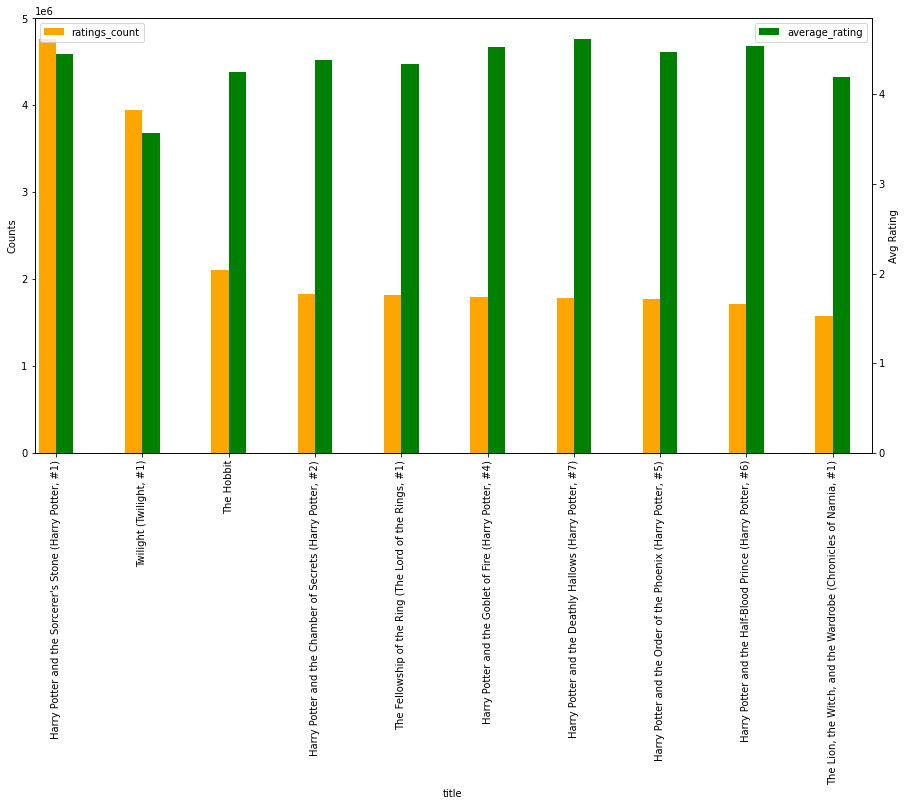

In [13]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

avg_rating = df_book[['title','ratings_count', 'average_rating']]
avg_rating = avg_rating.sort_values(by='ratings_count', ascending=False)[:10].set_index('title')



avg_rating['ratings_count'].plot(kind='bar', color='orange', ax=ax, width=width, position=1, legend='Counts')
avg_rating['average_rating'].plot( kind='bar', color='green', ax=ax2, width=width, position=0, legend='Avg Rating')

ax.set_ylabel('Counts')
ax2.set_ylabel('Avg Rating')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')


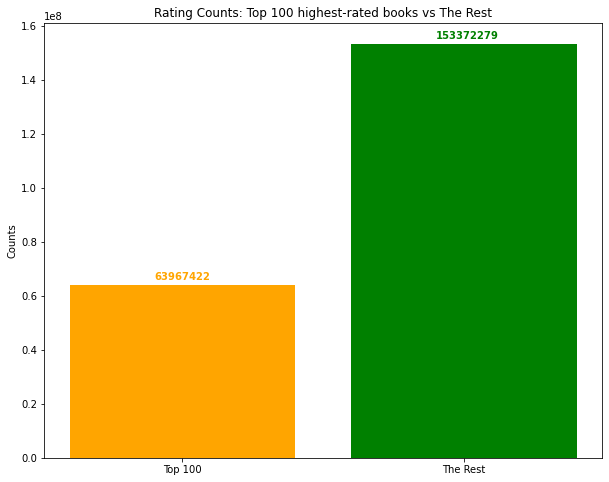

In [39]:
fig, ax = plt.subplots(figsize=(10,8))

avg_rating = df_book[['title','ratings_count', 'average_rating']]
Top_100_rating = avg_rating.sort_values(by='ratings_count', ascending=False)[:100].set_index('title')
the_rest_rating = avg_rating.sort_values(by='ratings_count', ascending=False)[100:].set_index('title')

counts = [Top_100_rating['ratings_count'].sum(), the_rest_rating['ratings_count'].sum()]
x = ["Top 100","The Rest"]
colors=['orange', 'green']

ax.bar(x, counts, color=colors)

ax.set_ylabel('Counts')
ax.set_title('Rating Counts: Top 100 highest-rated books vs The Rest')

for i, v in enumerate(counts):
    ax.text(i-0.10, v + 2000000, str(v), color=colors[i], fontweight='bold')

From the graph, we can see that the higher rated books trend to attach more reviewers. In top 100 highest-rated books, it has almost a half as many reviews as the rest of 258485 books. Let's get to know which one has the most rating counts. 

Here is the list of the top ten highest count books.

In [40]:
avg_rating.sort_values(by='ratings_count', ascending=False)[:10]

,title,ratings_count,average_rating
173961,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,4.45
63913,"Twilight (Twilight, #1)",3941381,3.57
88287,The Hobbit,2099680,4.25
196958,Harry Potter and the Chamber of Secrets (Harry...,1821802,4.38
239674,The Fellowship of the Ring (The Lord of the Ri...,1813229,4.34
246719,Harry Potter and the Goblet of Fire (Harry Pot...,1792561,4.53
178868,Harry Potter and the Deathly Hallows (Harry Po...,1784684,4.62
228269,Harry Potter and the Order of the Phoenix (Har...,1766895,4.47
94272,Harry Potter and the Half-Blood Prince (Harry ...,1713866,4.54
184105,"The Lion, the Witch, and the Wardrobe (Chronic...",1575387,4.19


### Word Count Distribution 

We want to gain some insight from book descriptions. We plan to use this feature to find similarity between two datasets. Since we are working with the fantasy book dataset, we start by taking a look on its word count distribution first. 

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

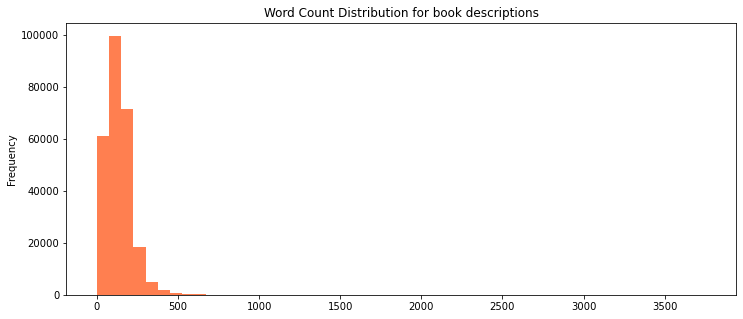

In [45]:
# Calculating the word count for book description
df_book['word_count'] = df_book['description'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df_book['word_count'].plot(
    kind='hist',
    bins = 50,
    color='coral',
    figsize = (12,5),title='Word Count Distribution for book descriptions')

The average word count is around 200 words. 

### Part-of-speech tags Distribution in book descriptions

Let's check out the distribution of its part-of-speech. This section we will use the help from Textblob library. Textblob library is an open-source python library for processing textual data. It performs different operations on textual data such as noun phrase extraction, sentiment analysis, classification, translation, etc.

In [46]:
!pip install textblob

<AxesSubplot:title={'center':'Top 20 Part-of-speech tagging for description'}>

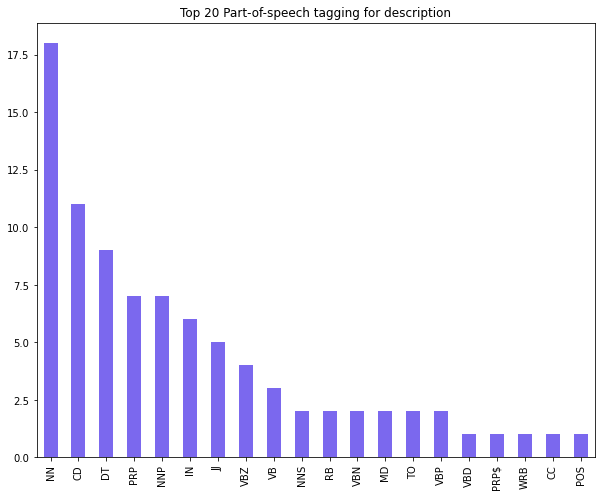

In [47]:
from textblob import TextBlob
blob = TextBlob(str(df_book['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar',
            color="mediumslateblue",
            figsize=(10, 8), 
            title = "Top 20 Part-of-speech tagging for description")

### Bigram Distribution 

Let's take a look on the distribution of bigram. We want to see some pattern of a sequence of two adjacent elements from a string of tokens.

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

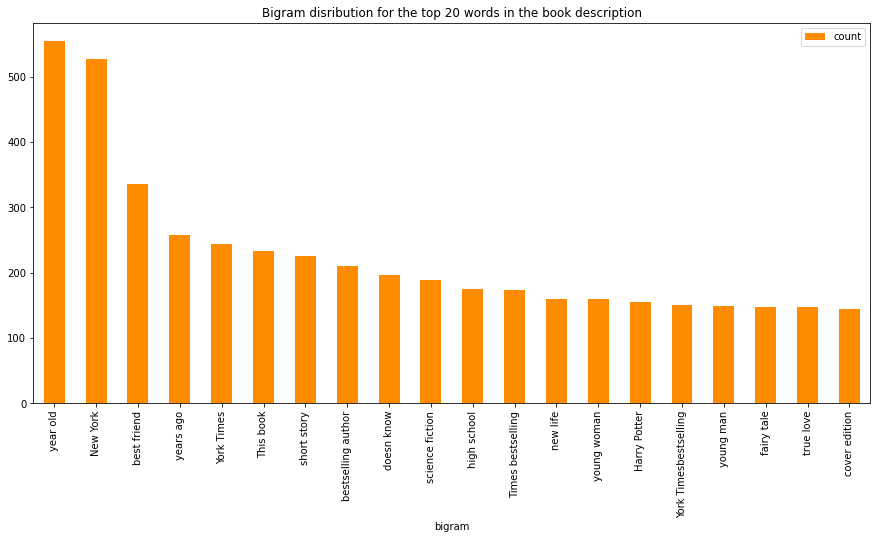

In [48]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df_book['description'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', 
            y='count', 
            kind = 'bar',
            color="darkorange",
            title = "Bigram disribution for the top 20 words in the book description", 
            figsize = (15,7))

### Trigram Distribution 

This time we take a look on the distribution of trigram. It is similar to bigram, but it is a sequence of three adjacent elements instead of two. 

<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

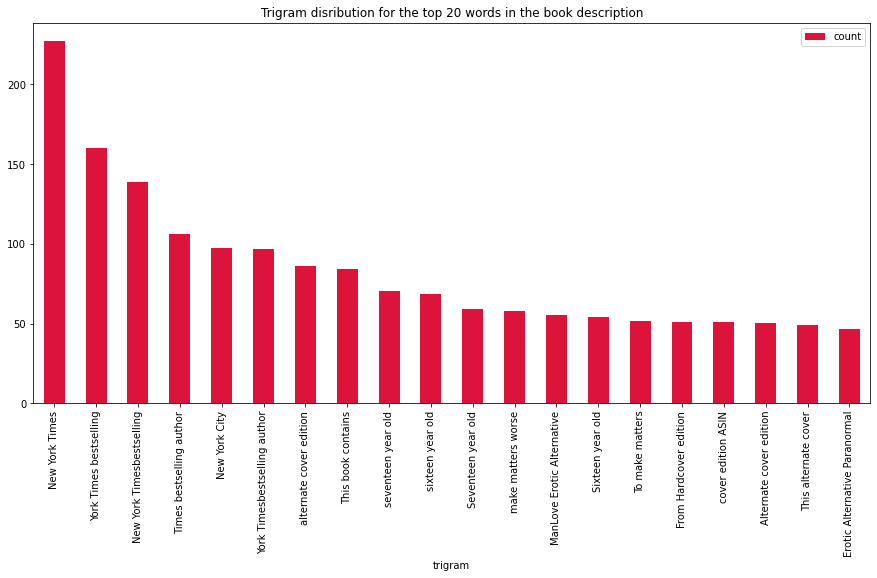

In [49]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df_book['description'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', 
             y='count', 
             kind = 'bar',
             color="crimson",
             title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7))

## Exploring the interaction dataset

We create a function to load in the dataset. **The typical pandas open file method will crash the notebook because of the size of the dataset**

**Note** The interaction dataset is huge. We choose to sample only 50000 interactions in order to make it work on the notebook. With higher computing power should try to increase the number of sample of choice by adjusting the default variable in load_data function to a greater number. 

In [50]:
def load_data(file_name, head = 50000):
    '''
    This function is built to read each line of the goodreads fantasy book interection dataset. Due to the size 
    of the dataset, the typical read json method will result in craching the notebook. 
        The variable head is set to 50000 as default. The user can change its number to a desired number of interections that
        suits their computing power.
    '''
    count = 0
    data = []
    with open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if (d['is_read'] == True) and (d['rating']!=0):
                count += 1
                data.append(d)
            else:
                continue
            
            # break if reaches limit line
            if (head is not None) and (count > head):
                break
    return data

In [51]:
interactions = load_data('data/goodreads_interactions_fantasy_paranormal.json')

Build an interaction dataframe from the list of interactions we got from the load_data function. Check out its information as usual.

In [52]:
df_inter = pd.DataFrame(interactions)

In [54]:
print(df_inter.info())
print(df_inter.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 50001 non-null  object
 1   book_id                 50001 non-null  object
 2   review_id               50001 non-null  object
 3   is_read                 50001 non-null  bool  
 4   rating                  50001 non-null  int64 
 5   review_text_incomplete  50001 non-null  object
 6   date_added              50001 non-null  object
 7   date_updated            50001 non-null  object
 8   read_at                 50001 non-null  object
 9   started_at              50001 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 3.5+ MB
None
             rating
count  50001.000000
mean       3.954181
std        0.961041
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


In [55]:
df_inter.sample(5)

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
46988,1e2e603a3d86ac5d2af6a85e76998766,20560137,71277b0bcf68d933736d203abba2b03a,True,5,,Thu Jan 22 09:34:50 -0800 2015,Mon May 02 13:06:01 -0700 2016,Thu Jun 25 06:08:12 -0700 2015,Wed Jun 17 00:00:00 -0700 2015
3058,478f3accbbb16d817fd90732215b6391,11306,93d8d0aa726fd5bb6521fd7d7df06ab3,True,5,,Sun Jul 04 16:28:23 -0700 2010,Sun Jul 04 16:28:23 -0700 2010,,
30508,617d78fda32f856fa561ee1ef2dd3672,65605,eb88380ae4b5b8c7f838a2ff9435bdc5,True,4,,Wed Jun 06 15:29:54 -0700 2012,Wed Jun 06 15:29:54 -0700 2012,,
17425,d430b5e0d8447a143a48467b1615f75e,74731,6a02cc903c02bcf570feab782c804086,True,3,,Wed Mar 19 17:52:47 -0700 2008,Wed Mar 19 17:52:47 -0700 2008,,
15806,689be7874f3af7d9eecbf0ddd3ff3002,91477,2d0dae7499ece36e7c1e8c49161052ee,True,3,,Thu Jun 07 19:03:26 -0700 2012,Thu Jun 07 19:03:26 -0700 2012,,


After we have our interaction dataframe, we can see some potential problems: 
1. We can see the first problem we have is that the user_id is in mixed form between string and integer. In further procress, this is going to cause a problem to out model.
2. The book_id type is not in the integer form.  

Let's fix these problems.

Fixing first problem with creating a unique integer index for user_id.

In [56]:
#group user_id and reset the index
indx = df_inter.groupby('user_id').count().reset_index()

In [57]:
#Function that returns the numeric id for a certain user.
def getIndex(user):
    return indx.index[indx['user_id'] == user][0]

In [58]:
#assign the numeric id to a new column 
df_inter['user_id_num'] = df_inter['user_id'].map(getIndex)

In [59]:
df_inter.sample(5)

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at,user_id_num
37983,e028174c62f21f80c42d1a8637414898,9440171,ae90298d21a1ea494b2b7969e9537f45,True,4,,Sun Nov 17 14:14:41 -0800 2013,Tue Nov 19 19:40:56 -0800 2013,Tue Nov 19 19:40:56 -0800 2013,Sun Nov 17 14:14:41 -0800 2013,783
23260,12f00f3694be5d8edc537bdae053fec0,45112,b5e1027fa7865b63d9e7d2690ca7cb3f,True,4,,Sat Nov 02 07:39:26 -0700 2013,Sat Nov 02 10:12:43 -0700 2013,,,76
48868,fdb96bba0571ccdc8e6dd938757329bc,17996994,3925c022e52157ba73129b7f3e9bcfce,True,5,,Thu May 19 05:18:01 -0700 2016,Tue Jul 05 03:11:37 -0700 2016,Fri Jan 01 00:00:00 -0800 2016,,874
44670,b0878d2dac36cbc1023b5119e8980951,34268,6d64238e92c092bf6ff61186e616a56a,True,5,,Sun Jul 14 08:33:06 -0700 2013,Sun Jul 14 08:33:06 -0700 2013,,,613
3646,559d843b319087e12f48282e386e401f,256683,f6a42c300db8d3682eddcde45f23b725,True,3,,Tue Jun 05 02:29:26 -0700 2012,Tue Jun 05 02:29:26 -0700 2012,,,298


Fixing second problem with changing the type of book_id to integer. 

In [62]:
df_inter = df_inter.astype({'book_id': 'int64'})

Done! We fixed the problems. Let's rearrange our dataframe by the numeric id.

In [64]:
df_inter.sort_values(by='user_id_num', inplace=True)

### Distribution of ratings in our interaction dataset

We want to see how users in our sampled dataset react to the book. 

In [65]:
count = df_inter['rating'].value_counts()

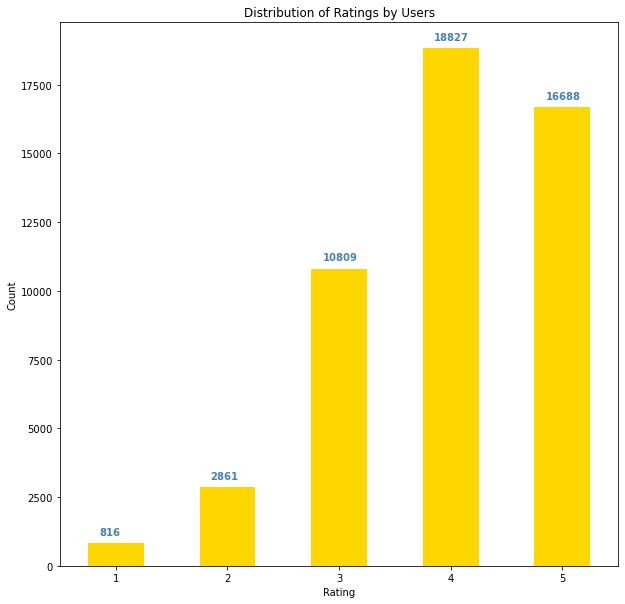

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
count = df_inter['rating'].value_counts().sort_index()

count.plot(kind='bar', use_index=True, ax=ax, color="gold")
ax.set_ylabel('Count')
ax.set_xticklabels(count.index, rotation=0)
ax.set_xlabel('Rating')

ax.set_title('Distribution of Ratings by Users')

for i, v in enumerate(count.values):
    ax.text(i-.15, v + 300, str(v), color='steelblue', fontweight='bold')

The distribution of rating in our dataset is left-skewed. Majority of users trend to rate books are quite optimistic, meaning that they trend to rate books with high regards.

### Box plot for user interaction

We want to learn about users' behavior in our dataset. We choose to display it with a boxplot.

Text(0.5, 1.0, 'Boxplot of Interactions from Users')

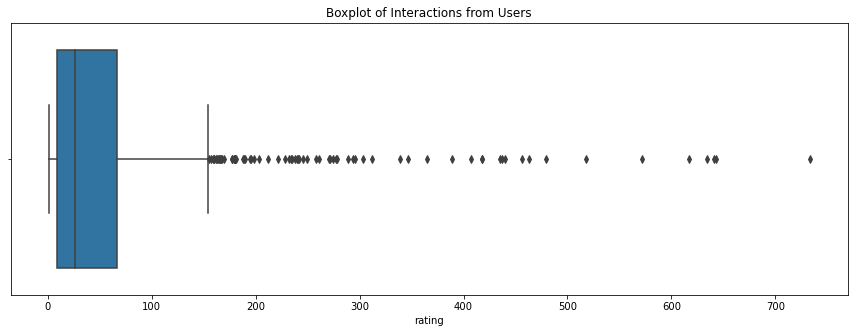

In [100]:
fig, ax = plt.subplots(figsize=(15,5))

box = df_inter.groupby('user_id_num').count()

ax = sns.boxplot(x=box['rating'])

ax.set_title('Boxplot of Interactions from Users')

In [95]:
box.describe()

count    881.000000
mean      56.754824
std       87.836658
min        1.000000
25%        9.000000
50%       26.000000
75%       67.000000
max      733.000000
Name: rating, dtype: float64

As you can see, the medium is 26 reviews per user while the mean is around 57 review per user. The large gap is a result of having some outliers with extremely high numbers of interactions. For example, there is one user rates the total of 733 books; there are a few users rate above 500 books.

## We pickle the dataset out to use in the next technical notebook.

In [249]:
import pickle 

In [250]:
inter_pk = df_inter[['user_id_num', 'book_id', 'rating']]

In [251]:
filename = 'interact'
outfile = open(filename,'wb')
pickle.dump(inter_pk,outfile)
outfile.close()